In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv ('New_York_reviews.csv',low_memory=False)

## Build New Dataset about Rating

In [4]:
# Converting to numeric values
df['rating_review'] = pd.to_numeric(df['rating_review'], errors='coerce')
# Drop rows with missing values in 'rating_review'
df = df.dropna(subset=['rating_review'])
# Group by restaurant and calculate statistics
review_stats = df.groupby('restaurant_name')['rating_review'].agg(['count', 'mean', 'max', 'min', 'median'])
# Get the top 15 restaurants with the highest number of reviews
top_15_reviews = review_stats.nlargest(15, 'count')


In [5]:
review_stats.head()

,count,mean,max,min,median
restaurant_name,,,,,
12_Chairs,190,4.394737,5.0,1.0,5.0
16_Handles,1,5.000000,5.0,5.0,5.0
1902_Empire_Iii_Inc,1,1.000000,1.0,1.0,1.0
1_Chimi_Sushi,1,5.000000,5.0,5.0,5.0
211_New_Taco_Grill,2,2.500000,4.0,1.0,2.5


In [10]:
top_15_reviews

,count,mean,max,min,median
restaurant_name,,,,,
Carmine_s_Italian_Restaurant_Times_Square,6992,4.402460,5.0,1.0,5.0
Eataly,3602,4.331483,5.0,1.0,5.0
Buddakan,3473,4.477973,5.0,1.0,5.0
The_Smith,3455,4.189001,5.0,1.0,4.0
Ellen_s_Stardust_Diner,3362,4.004462,5.0,1.0,4.0
Brooklyn_Diner,3034,4.022413,5.0,1.0,4.0
Club_A_Steakhouse,2970,4.708081,5.0,1.0,5.0
Bill_s_Bar_Burger,2824,3.984419,5.0,1.0,4.0
Loeb_Boathouse_Central_Park,2816,4.165838,5.0,1.0,4.0


## Distribution of Number of Reviews per Restaurant

Max Reviews: 6992
Min Reviews: 1
Median Reviews: 148.0


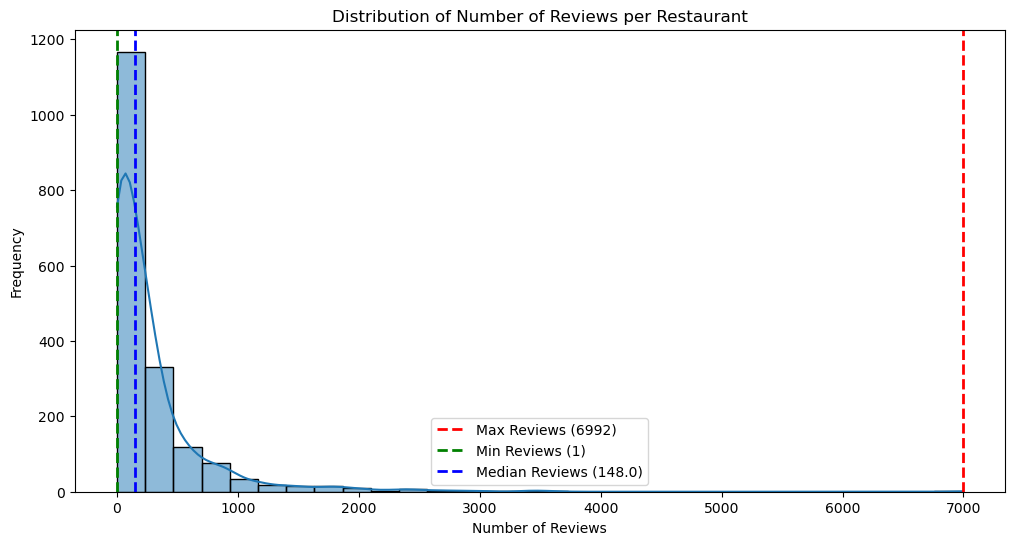

In [8]:
max_reviews = review_stats['count'].max()
min_reviews = review_stats['count'].min()
median_reviews = review_stats['count'].median()

# Print the results
print("Max Reviews:", max_reviews)
print("Min Reviews:", min_reviews)
print("Median Reviews:", median_reviews)

# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(review_stats['count'], bins=30, kde=True)
plt.title("Distribution of Number of Reviews per Restaurant")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.axvline(max_reviews, color='red', linestyle='dashed', linewidth=2, label=f'Max Reviews ({max_reviews})')
plt.axvline(min_reviews, color='green', linestyle='dashed', linewidth=2, label=f'Min Reviews ({min_reviews})')
plt.axvline(median_reviews, color='blue', linestyle='dashed', linewidth=2, label=f'Median Reviews ({median_reviews})')
plt.legend()
plt.show()

## Top 15 Restaurants with the Highest Number of Reviews

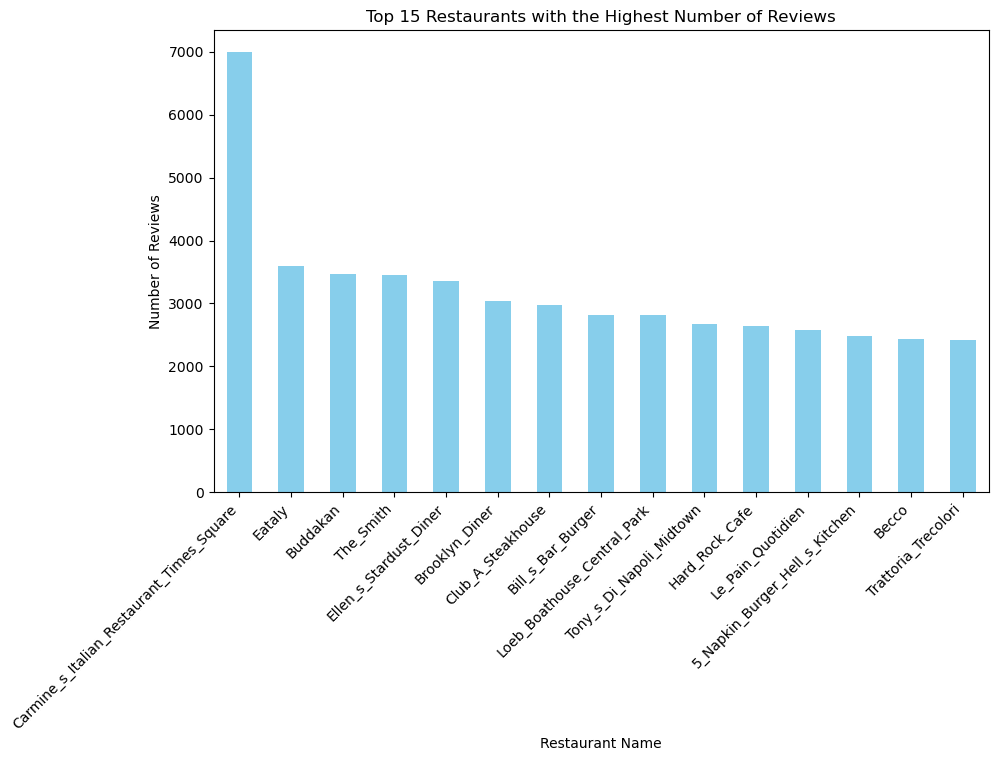

In [9]:
plt.figure(figsize=(10, 6))
top_15_reviews['count'].plot(kind='bar', color='skyblue')
plt.title('Top 15 Restaurants with the Highest Number of Reviews')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## Distribution of Average Rating of Restaurants with more than 100 Reviews

In [13]:
mean_rating = review_stats['mean'].mean()
mean_rating

4.227572785904697

Mean Rating: 4.241170560786772


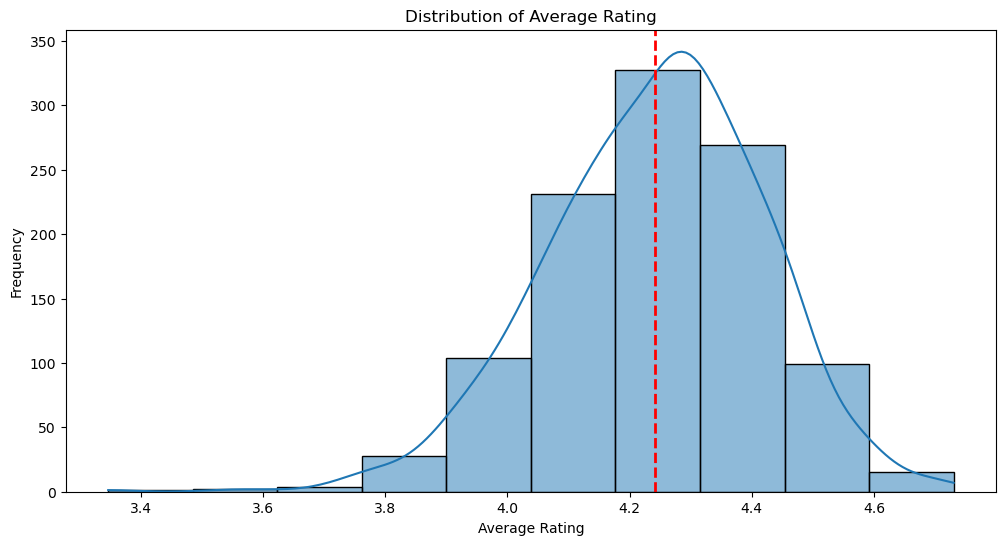

In [14]:
mean_rating = review_stats[review_stats['count']>100]['mean'].mean()
print("Mean Rating:", mean_rating)

plt.figure(figsize=(12, 6))
sns.histplot(review_stats[review_stats['count']>100]['mean'], bins=10, kde=True)
plt.title("Distribution of Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.axvline(mean_rating, color='red', linestyle='dashed', linewidth=2, label=f'Mean Rating ({mean_rating})')
plt.show()

## Average Rating of Top 15 Restaurants

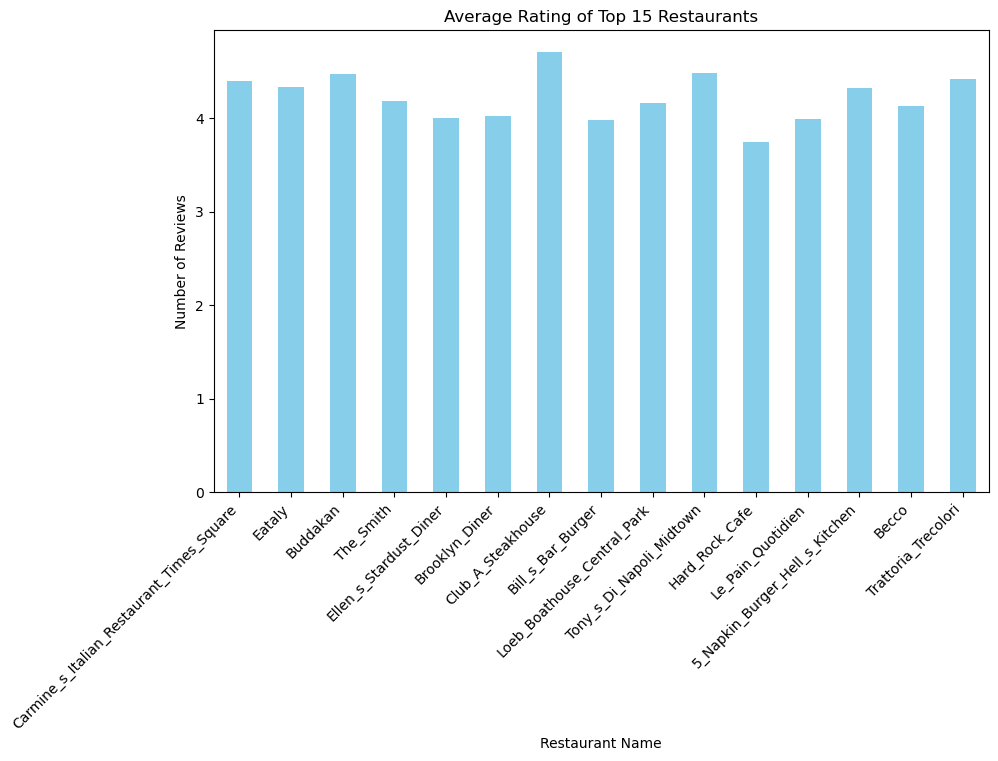

In [15]:
plt.figure(figsize=(10, 6))
top_15_reviews['mean'].plot(kind='bar', color='skyblue')
plt.title('Average Rating of Top 15 Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right') 
plt.show()

## Trend of Average Rating  

In [97]:
# build new dataset with formatted data column Y_M and average rating of each restaurant in each month
df['date'] = pd.to_datetime(df['date'])
df['Y_M'] = df['date'].dt.to_period('M')
df_Y_M = df.groupby(['restaurant_name', 'Y_M'])['rating_review'].mean().reset_index()
df_Y_M

,restaurant_name,Y_M,rating_review
0,12_Chairs,2006-10,5.00
1,12_Chairs,2008-08,3.00
2,12_Chairs,2008-09,5.00
3,12_Chairs,2010-05,4.00
4,12_Chairs,2010-10,5.00
...,...,...,...
104032,Zuma,2020-01,4.75
104033,Zuma,2020-02,4.00
104034,Zuma,2020-04,5.00
104035,Zuma,2020-08,4.00


In [95]:
def avg_rating_trend(df, restaurants_lst, year_lst):
    # Make sure restaurants_lst and year_lst are lists, and df should be df_Y_M in this project
    plt.figure(figsize=(12, 6))
    for restaurant in restaurants_lst:
        # Filter the DataFrame
        selected_df = df[df['restaurant_name'] == restaurant]
        selected_df = selected_df[selected_df['Y_M'].dt.year.isin(year_lst)]
        # Plot the average ratings trend
        plt.plot(selected_df['Y_M'].astype(str), selected_df['rating_review'], label=restaurant)

#     Adding index as text on each data point
#     for i, restaurant in enumerate(top_restaurants):
#         for j, txt in enumerate(selected_df['rating_review'].astype(str)):
#             plt.annotate(txt, (selected_df['rating_review'].astype(str)[j], monthly_avg_ratings.values[j]))

    plt.title('Monthly Average Ratings Over Time')
    plt.xlabel('Month')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.show()

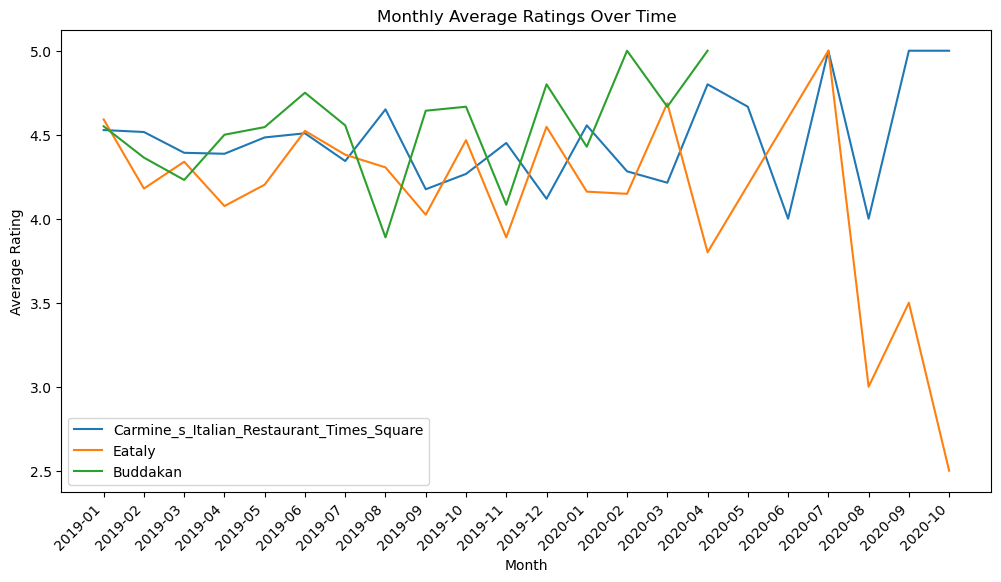

In [96]:
# Get the top n restaurants with most reviews
n = 3
top_restaurants = review_stats['count'].nlargest(n).index

# Using function to draw the line plot
avg_rating_trend(df_Y_M, top_restaurants, [2019, 2020])